# UFC Predictions

### Step 1: Load Data

The following CSV files were retrieved from the Kaggle UFC dataset.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.options.display.max_columns = 999

dat_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-2-Applied-Modeling/master/data/ufc/data.csv")
prep_dat_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-2-Applied-Modeling/master/data/ufc/preprocessed_data.csv")
raw_fighters_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-2-Applied-Modeling/master/data/ufc/raw_fighter_details.csv")
raw_dat_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-2-Applied-Modeling/master/data/ufc/raw_total_fight_data.csv", sep=";")

dat_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

In [2]:
# I'd like to have one row per fighter per fight. That is, 2 rows per fight, with a simple "is_winner" column.

import re


r_fighter_cols = [col for col in dat_df.columns if col.startswith("R_")]
b_fighter_cols = [col for col in dat_df.columns if col.startswith("B_")]

other_cols = [col for col in dat_df.columns if col not in r_fighter_cols and col not in b_fighter_cols]

def extractFighters(dat_df, fighter_cols, opp_cols, fighter_prefix, opp_prefix, fighter_color):

    fighters_df = dat_df[fighter_cols + other_cols].copy()
    fighters_df.columns = [col.replace(fighter_prefix, "") for col in fighters_df.columns]
    fighters_df["is_winner"] = fighters_df["Winner"] == fighter_color

    opp_df = dat_df[opp_cols].copy()
    opp_df.columns = [re.sub(r"^" + opp_prefix, "opponent_", col) for col in opp_df.columns]

    fighters_df = pd.concat([fighters_df, opp_df], axis=1)
    
    return fighters_df

r_fighters_df = extractFighters(dat_df, r_fighter_cols, b_fighter_cols, "R_", "B_", "Red")
b_fighters_df = extractFighters(dat_df, b_fighter_cols, r_fighter_cols, "B_", "R_", "Blue")

fighters_df = pd.concat([r_fighters_df, b_fighters_df], axis=0)
fighters_df.head()

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,Winner,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,opponent_Height_cms,opponent_Reach_cms,opponent_Stance,opponent_Weight_lbs,opponent_age,opponent_avg_BODY_att,opponent_avg_BODY_landed,opponent_avg_CLINCH_att,opponent_avg_CLINCH_landed,opponent_avg_DISTANCE_att,opponent_avg_DISTANCE_landed,opponent_avg_GROUND_att,opponent_avg_GROUND_landed,opponent_avg_HEAD_att,opponent_avg_HEAD_landed,opponent_avg_KD,opponent_avg_LEG_att,opponent_avg_LEG_landed,opponent_avg_PASS,opponent_avg_REV,opponent_avg_SIG_STR_att,opponent_avg_SIG_STR_landed,opponent_avg_SIG_STR_pct,opponent_avg_SUB_ATT,opponent_avg_TD_att,opponent_avg_TD_landed,opponent_avg_TD_pct,opponent_avg_TOTAL_STR_att,opponent_avg_TOTAL_STR_landed,opponent_avg_opp_BODY_att,opponent_avg_opp_BODY_landed,opponent_avg_opp_CLINCH_att,opponent_avg_opp_CLINCH_landed,opponent_avg_opp_DISTANCE_att,opponent_avg_opp_DISTANCE_landed,opponent_avg_opp_GROUND_att,opponent_avg_opp_GROUND_landed,opponent_avg_opp_HEAD_att,opponent_avg_opp_HEAD_landed,opponent_avg_opp_KD,opponent_avg_opp_LEG_att,opponent_avg_opp_LEG_landed,opponent_avg_opp_PASS,opponent_avg_opp_REV,opponent_avg_opp_SIG_STR_att,opponent_avg_opp_SIG_STR_landed,opponent_avg_opp_SIG_STR_pct,opponent_avg_opp_SUB_ATT,opponent_avg_opp_TD_att,opponent_avg_opp_TD_landed,opponent_avg_opp_TD_pct,opponent_avg_opp_TOTAL_STR_att,opponent_avg_opp_TOTAL_STR_landed,opponent_current_lose_streak,opponent_current_win_streak,opponent_draw,opponent_fighter,opponent_longest_win_streak,opponent_losses,opponent_total_rounds_fought,opponent_total_time_fought(seconds),opponent_total_title_bouts,opponent_win_by_Decision_Majority,opponent_win_by_Decision_Split,opponent_win_by_Decision_Unanimous,opponent_win_by_KO/TKO,opponent_win_by_Submission,opponent_win_by_TKO_Doctor_Stoppage,opponent_wins,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins
0,162.56,162.56,Marc Goddard,Orthodox,135.0,Red,32.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,NaN,NaN,NaN,101.400000,44.000000,0.466000,NaN,0.100000,5.300000,1.900000,0.458000,NaN,NaN,129.900000,69.100000,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,NaN,NaN,NaN,98.800000,32.200000,0.336000,NaN,0.000000,0.900000,0.100000,0.050000,NaN,NaN,110.500000,43.300000,0.0,4.0,2019-06-08,0.0,Henry Cejudo,True,"Chicago, Illinois, USA",4.0,2.0,5,167.64,170.18,Orthodox,135.0,31.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400

In [3]:

for col in [col for col in fighters_df.select_dtypes(include="number").columns if col.startswith("opponent_")]:
    
    col2 = col
    col1 = col[9:]
    
    fighters_df[col1 + "_ratio"] = (fighters_df[col1] + 1) / (fighters_df[col2] + 1)
    
# prevent leakage
fighters_df = fighters_df.drop(columns="Winner")

# change prefixes to suffixes
fighters_df.columns = [col[9:] + "_opponent" if col.startswith("opponent_") else col for col in fighters_df.columns]


### Step 2: Establish Baseline

This is expected to be exactly 50% because for every winner there is a loser.

In [4]:
from sklearn.metrics import accuracy_score

majority_class = fighters_df["is_winner"].mode()[0]
baseline_pred = [majority_class] * len(fighters_df)
baseline_acc = accuracy_score(baseline_pred, fighters_df["is_winner"]) * 100

print(f"""
    Majority class: {majority_class}
    Baseline accuracy: {baseline_acc:.2f}%
""")


    Majority class: False
    Baseline accuracy: 50.81%



##### Explanation

It turns out 50.81% have False for "is_winner". This is probably because in the case of ties, neither fighter is considered the winner.

### Step 3: Linear Model

We will use a `LogisticRegression` and see if we can beat the baseline.

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

drop_cols = ["age", "age_opponent", "age_ratio", "Referee", "date"]
train, test = train_test_split(fighters_df)

target = "is_winner"
features = fighters_df.columns.drop([target] + drop_cols)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [6]:
lr_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value="0"),
    LogisticRegression(max_iter=333),
)

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

lr_score = accuracy_score(y_pred, y_test)*100
improvement = lr_score - baseline_acc

print(f"""
    Accuracy score for LogisticRegression: {lr_score:.2f}%
    Improvement over baseline: {improvement:.2f}%
""")

/home/cowley/venv/lambda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



    Accuracy score for LogisticRegression: 65.51%
    Improvement over baseline: 14.71%



We achieved a notable improvement over baseline with a logistic regression.

### Step 4: Try RandomForestClassifier

We will use a `RandomForestClassifier` and see if we can beat the logistic regression.

In [7]:
from sklearn.ensemble import RandomForestClassifier

rfc_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value=0),
    RandomForestClassifier(n_jobs=-1, n_estimators=220),
)

rfc_pipeline.fit(X_train, y_train)
y_pred = rfc_pipeline.predict(X_test)

rfc_score = accuracy_score(y_pred, y_test)*100
improvement_base = rfc_score - baseline_acc
improvement_lr = rfc_score - lr_score

print(f"""
    Accuracy score for Random Forest: {rfc_score:.2f}%
    Improvement over baseline: {improvement_base:.2f}%
    Improvement over logistic: {improvement_lr:.2f}%
""")


    Accuracy score for Random Forest: 64.15%
    Improvement over baseline: 13.35%
    Improvement over logistic: -1.36%



### Step 5: Try XGBClassifier

We will use a `XGBClassifier` to see if we can beat the random forest.

The parameters were optimized with a `RandomizedSearchCV` in a separate notebook.

In [8]:
from xgboost import XGBClassifier

xgb_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value=0),
    XGBClassifier(
        n_jobs=-1,
        n_estimators=220,
        max_depth=76,
        learning_rate=0.22,
    )
)


xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_pipeline.predict(X_test)

xgb_score = accuracy_score(y_pred, y_test)*100
improvement_base = xgb_score - baseline_acc
improvement_lr = xgb_score - lr_score
improvement_rfc = xgb_score - rfc_score

print(f"""
    Accuracy score for XGB: {xgb_score:.2f}%
    Improvement over baseline: {improvement_base:.2f}%
    Improvement over logistic: {improvement_lr:.2f}%
    Improvement over random forest: {improvement_rfc:.2f}%
""")


    Accuracy score for XGB: 63.88%
    Improvement over baseline: 13.07%
    Improvement over logistic: -1.63%
    Improvement over random forest: -0.27%



### Step 6: Permutation Importance

Analyze which features may detract from the accuracy.

In [9]:
from eli5.sklearn import PermutationImportance

transformer = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="constant", fill_value=0),
)

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

/home/cowley/venv/lambda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/cowley/venv/lambda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
from matplotlib import pyplot as plt

model = XGBClassifier(
    n_jobs=-1,
    n_estimators=220,
    max_depth=76,
    learning_rate=0.22,
)
model.fit(X_train_transformed, y_train)

permuter = PermutationImportance(
    model,
    scoring="accuracy",
    n_iter=5,
)

permuter.fit(X_test_transformed, y_test)

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.22,
                                              max_delta_step=0, max_depth=76,
                                              min_child_weight=1, missing=None,
                                              n_estimators=220, n_jobs=-1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None,
                  

In [11]:
feature_importances_plus_std = pd.Series(permuter.feature_importances_ + permuter.feature_importances_std_, features)

xgb_best_features = fighters_df.columns.drop([target] + drop_cols + list(feature_importances_plus_std[feature_importances_plus_std <= 0].index))

X_train_xgb = train[xgb_best_features]
X_test_xgb = test[xgb_best_features]

xgb_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value=0),
    XGBClassifier(
        n_jobs=-1,
        n_estimators=220,
        max_depth=76,
        learning_rate=0.22,
    )
)


xgb_pipeline.fit(X_train_xgb, y_train)
y_pred = xgb_pipeline.predict(X_test_xgb)

xgb_score2 = accuracy_score(y_pred, y_test)*100
improvement_base = xgb_score2 - baseline_acc
improvement_xgb = xgb_score2 - xgb_score

print(f"""
    Accuracy score for XGB with optimized features: {xgb_score2:.2f}%
    Improvement over baseline: {improvement_base:.2f}%
    Improvement over base XGB: {improvement_xgb:.2f}%
""")


    Accuracy score for XGB with optimized features: 64.81%
    Improvement over baseline: 14.01%
    Improvement over base XGB: 0.93%



Little difference.

Let's try again with Random Forest.

In [12]:
model = RandomForestClassifier(
    n_jobs=-1,
    n_estimators=220,
)
model.fit(X_train_transformed, y_train)

permuter = PermutationImportance(
    model,
    scoring="accuracy",
    n_iter=5,
)

permuter.fit(X_test_transformed, y_test)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [13]:
feature_importances_plus_std = pd.Series(permuter.feature_importances_ + permuter.feature_importances_std_, features)

rfc_best_features = fighters_df.columns.drop([target] + drop_cols + list(feature_importances_plus_std[feature_importances_plus_std <= 0].index))

X_train_rfc = train[rfc_best_features]
X_test_rfc = test[rfc_best_features]

rfc_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value=0),
    RandomForestClassifier(
        n_jobs=-1,
        n_estimators=220,
    )
)

rfc_pipeline.fit(X_train_rfc, y_train)
y_pred = rfc_pipeline.predict(X_test_rfc)

rfc_score2 = accuracy_score(y_pred, y_test)*100
improvement_base = rfc_score2 - baseline_acc
improvement_rfc = rfc_score2 - rfc_score

print(f"""
    Accuracy score for Random Forest with optimized features: {rfc_score2:.2f}%
    Improvement over baseline: {improvement_base:.2f}%
    Improvement over base RFC: {improvement_rfc:.2f}%
""")


    Accuracy score for Random Forest with optimized features: 64.46%
    Improvement over baseline: 13.66%
    Improvement over base RFC: 0.31%



To wrap up the permutations, I'd like to make two more visualizations showing the feature importances.

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


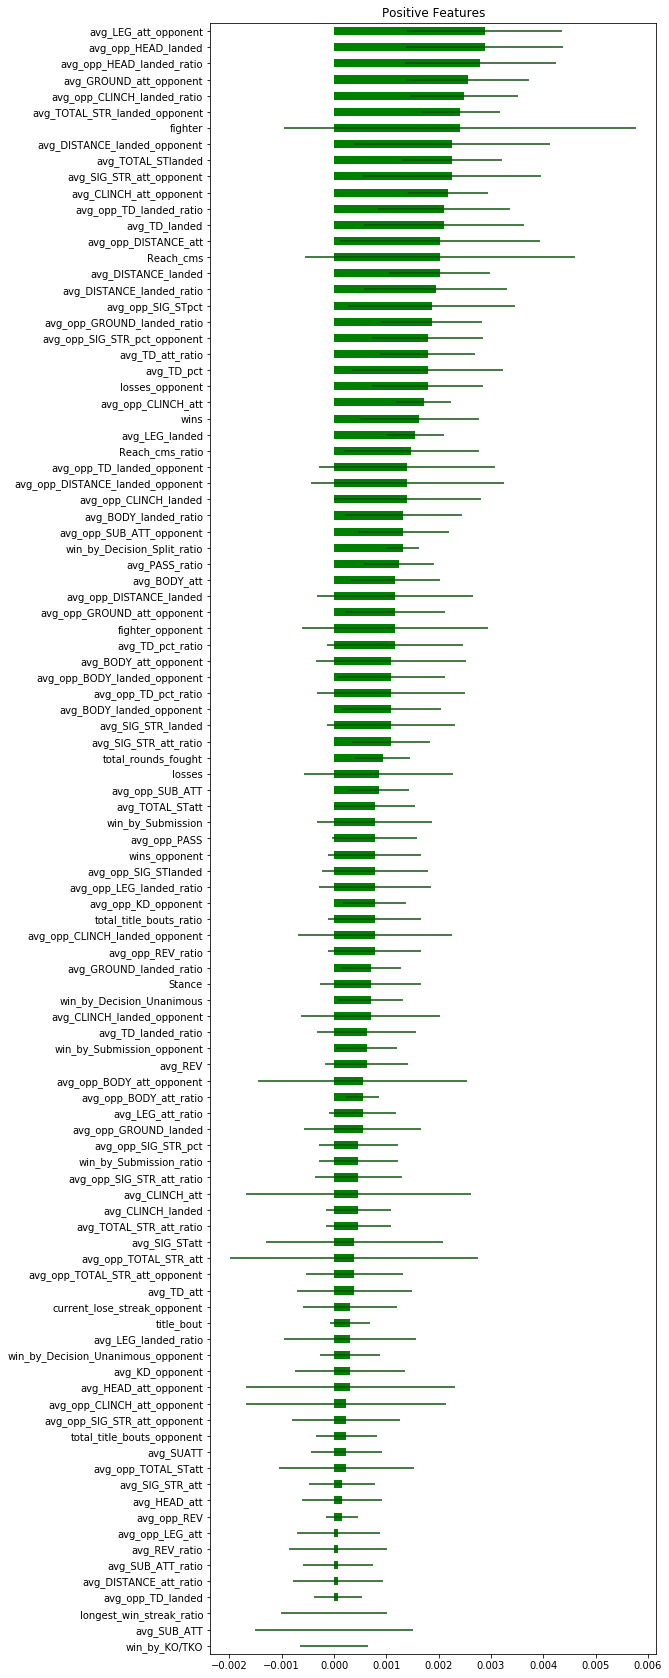

In [14]:
feature_importances = pd.Series(permuter.feature_importances_, features).sort_values()
feature_importances_std = pd.Series(permuter.feature_importances_std_, features).sort_values()

good_mask = feature_importances > 0
bad_mask = feature_importances <= 0

fig, ax = plt.subplots(figsize=(8, 30))

feature_importances[good_mask].plot.barh(color="green", ecolor="#105010", xerr=feature_importances_std[good_mask], ax=ax)
ax.set_title("Positive Features")

fig.show()

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


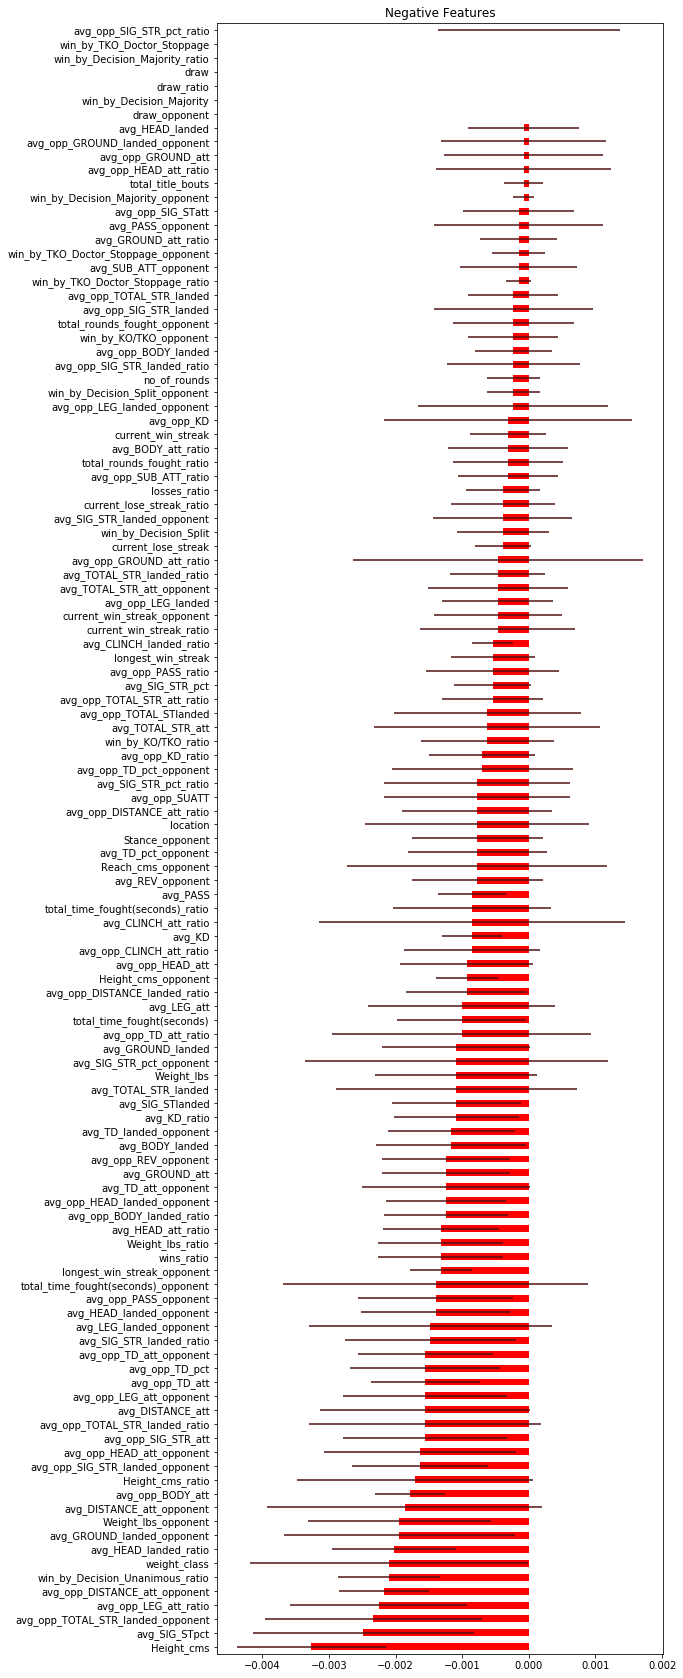

In [15]:
fig, ax = plt.subplots(figsize=(8, 30))

feature_importances[bad_mask].plot.barh(color="red", ecolor="#501010", xerr=feature_importances_std[bad_mask], ax=ax)
ax.set_title("Negative Features")

fig.show()

### Run More Tests

While the previous tests were purely numbers-based, the following human-oriented tests will predict the outcome of real high-profile matches. 

In [16]:


prefix_re = re.compile(r".*(_opponent)|(_ratio)$")

fighters_individual_df = fighters_df[[col for col in fighters_df.columns.drop(["is_winner"]) if not prefix_re.match(col)]]
latest_fights = fighters_individual_df.sort_values(by="date").groupby("fighter").tail(1)

def getByFighter(fighter_name):
    return latest_fights[latest_fights["fighter"] == fighter_name].copy()

def makeBoutDf(fighter1, fighter2):
    
    fighter1_df = getByFighter(fighter1)
    fighter2_df = getByFighter(fighter2)
    
    fighter1_df["temp_id_"] = fighter2_df["temp_id_"] = np.random.randint(2**31)
    fighter1_df, fighter2_df = (
        pd.merge(fighter1_df, fighter2_df, on="temp_id_", suffixes=("", "_opponent")),
        pd.merge(fighter2_df, fighter1_df, on="temp_id_", suffixes=("", "_opponent")),
    )
    
    fight_df = pd.concat([fighter1_df, fighter2_df])
    
    for col in [col for col in fight_df.select_dtypes(include="number").columns if col.endswith("_opponent")]:

        col2 = col
        col1 = col[:-9]

        fight_df[col1 + "_ratio"] = (fight_df[col1] + 1) / (fight_df[col2] + 1)
    
    fight_df["stance_config"] = fight_df["Stance"] + "-" + fight_df["Stance_opponent"]
    
    return fight_df.drop(columns=["temp_id_"])

def scoreBout(bout):
    return pd.DataFrame(data=pipeline.predict_proba(bout[features]), columns=[str(x) for x in pipeline.classes_])

def doPrediction(red_fighter, blue_fighter):
    bout = makeBoutDf(red_fighter, blue_fighter)
    probas = scoreBout(bout)
    
    red_fighter_prob = (probas.iloc[0]["True"] + probas.iloc[1]["False"])/2
    blue_fighter_prob = (probas.iloc[0]["False"] + probas.iloc[1]["True"])/2
    
    if red_fighter_prob > blue_fighter_prob:
        return red_fighter_prob, red_fighter
    
    else:
        return blue_fighter_prob, blue_fighter

trials = [
    ("Kamaru Usman", "Colby Covington"),
    ("Jorge Masvidal", "Nate Diaz"),
    ("Conor McGregor", "Khabib Nurmagomedov"),
    ("Robert Whittaker", "Israel Adesanya"),
    ("Max Holloway", "Frankie Edgar"),
    ("Michelle Waterson", "Joanna Jedrzejczyk"),
    ("Amanda Nunes", "Germaine de Randamie"),
    ("Jon Jones", "Anthony Smith"),
    ("Khabib Nurmagomedov", "Dustin Poirier"),
    ("Ben Askren", "Robbie Lawler"),
    ("Alexander Volkanovski", "Max Holloway"),
    ("Ben Askren", "Jorge Masvidal"),
]

def runTests():
    for b_fighter, r_fighter in trials:
        print(b_fighter, "vs", r_fighter)
        print("\t", doPrediction(b_fighter, r_fighter))

In [17]:
pipeline = rfc_pipeline
features = rfc_best_features
runTests()

Kamaru Usman vs Colby Covington
	 (0.5522727272727272, 'Kamaru Usman')
Jorge Masvidal vs Nate Diaz
	 (0.5022727272727272, 'Jorge Masvidal')
Conor McGregor vs Khabib Nurmagomedov
	 (0.7318181818181818, 'Khabib Nurmagomedov')
Robert Whittaker vs Israel Adesanya
	 (0.5181818181818182, 'Israel Adesanya')
Max Holloway vs Frankie Edgar
	 (0.5340909090909091, 'Frankie Edgar')
Michelle Waterson vs Joanna Jedrzejczyk
	 (0.5772727272727273, 'Michelle Waterson')
Amanda Nunes vs Germaine de Randamie
	 (0.5772727272727273, 'Amanda Nunes')
Jon Jones vs Anthony Smith
	 (0.6386363636363637, 'Jon Jones')
Khabib Nurmagomedov vs Dustin Poirier
	 (0.6613636363636364, 'Khabib Nurmagomedov')
Ben Askren vs Robbie Lawler
	 (0.5159090909090909, 'Ben Askren')
Alexander Volkanovski vs Max Holloway
	 (0.5568181818181819, 'Alexander Volkanovski')
Ben Askren vs Jorge Masvidal
	 (0.5272727272727272, 'Ben Askren')


In [18]:
pipeline = xgb_pipeline
features = xgb_best_features
runTests()

Kamaru Usman vs Colby Covington
	 (0.5230129361152649, 'Kamaru Usman')
Jorge Masvidal vs Nate Diaz
	 (0.8289958238601685, 'Jorge Masvidal')
Conor McGregor vs Khabib Nurmagomedov
	 (0.9912072420120239, 'Khabib Nurmagomedov')
Robert Whittaker vs Israel Adesanya
	 (0.7688595056533813, 'Israel Adesanya')
Max Holloway vs Frankie Edgar
	 (0.5499550104141235, 'Frankie Edgar')
Michelle Waterson vs Joanna Jedrzejczyk
	 (0.8925784230232239, 'Michelle Waterson')
Amanda Nunes vs Germaine de Randamie
	 (0.8487163782119751, 'Amanda Nunes')
Jon Jones vs Anthony Smith
	 (0.895398736000061, 'Jon Jones')
Khabib Nurmagomedov vs Dustin Poirier
	 (0.9816449880599976, 'Khabib Nurmagomedov')
Ben Askren vs Robbie Lawler
	 (0.7380614280700684, 'Ben Askren')
Alexander Volkanovski vs Max Holloway
	 (0.9192683696746826, 'Alexander Volkanovski')
Ben Askren vs Jorge Masvidal
	 (0.5001752376556396, 'Jorge Masvidal')


### Export the best pipeline

In [24]:
import pickle

with open("../pickles/pipeline.pickle", "wb") as f:
    pickle.dump(rfc_pipeline, f)
    
with open("../pickles/features.pickle", "wb") as f:
    pickle.dump(rfc_best_features, f)



In [25]:
!tar -cvzf ../pickles/pickles.tar.gz ../pickles/*.pickle
!rm ../pickles/*.pickle

tar: Removing leading `../' from member names
../pickles/feature_to_name.pickle
../pickles/features.pickle
../pickles/pipeline.pickle


### More Visualizations

In [49]:
from plotly.offline import init_notebook_mode, iplot, plot
from plotly import express as px
from plotly import graph_objects as go

init_notebook_mode(connected=True)

fig = px.scatter(fighters_df, x="Reach_cms", y="age_ratio", color="is_winner")
plot(fig)

'temp-plot.html'

In [69]:
def plotFeatures(xname, yname):
    
    xs = fighters_df[xname]
    ys = fighters_df[yname]
    
    xs = xs[
        (xs.quantile(0.05) < xs) &
        (xs < xs.quantile(0.95))
    ]    
    ys = ys[
        (ys.quantile(0.05) < ys) &
        (ys < ys.quantile(0.95))
    ]
    
    fig = go.Figure(
        go.Histogram2dContour(
            x=xs,
            y=ys,
            z=fighters_df["is_winner"].replace({False: -1, True: 1}),
            ncontours=20,
        )
    )
    plot(fig)
    
plotFeatures(
    "win_by_Submission_ratio",
    "win_by_Decision_Unanimous_ratio"
)

I generated a number of heat map plots and none were particularly interesting.

### More Visualizations

In [130]:

transformer = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="constant", fill_value=0),
)

model = make_pipeline(
    XGBClassifier(n_jobs=-1, n_estimators=220, max_depth=76, learning_rate=0.25),
)

X_train_transformed = pd.DataFrame(data=transformer.fit_transform(X_train), columns=X_train.columns).astype(np.float64)
X_test_transformed = pd.DataFrame(data=transformer.transform(X_test), columns=X_test.columns).astype(np.float64)

model.fit(X_train_transformed, y_train)

def pdpPlot(name):
    
    isolated = pdp_isolate(
        model=model,
        dataset=X_test_transformed,
        model_features=X_test.columns,
        feature=name,
        num_grid_points=50,
    )

    fig, ax = pdp_plot(isolated, feature_name=name)
    ax["pdp_ax"].set_xlim([0.7, 1.4])
    fig.show()

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



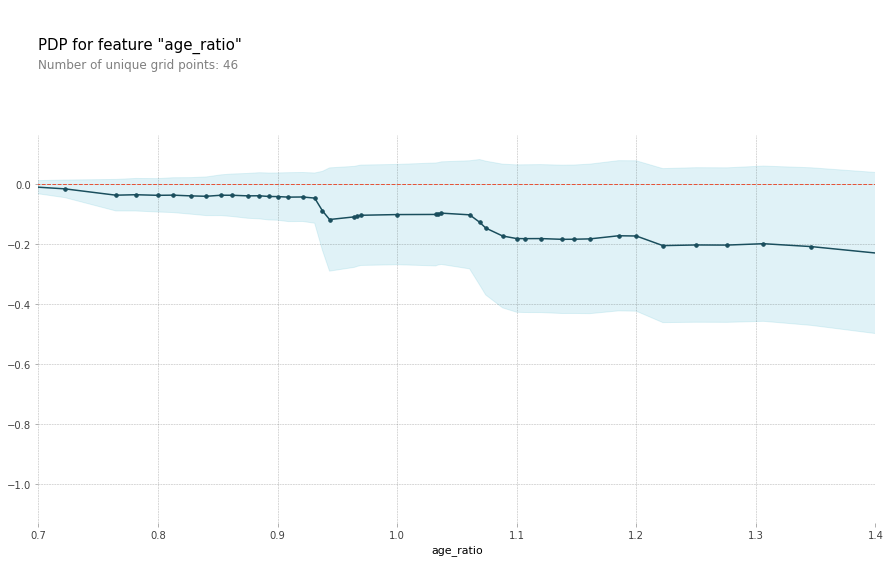

In [131]:
pdpPlot("age_ratio")

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



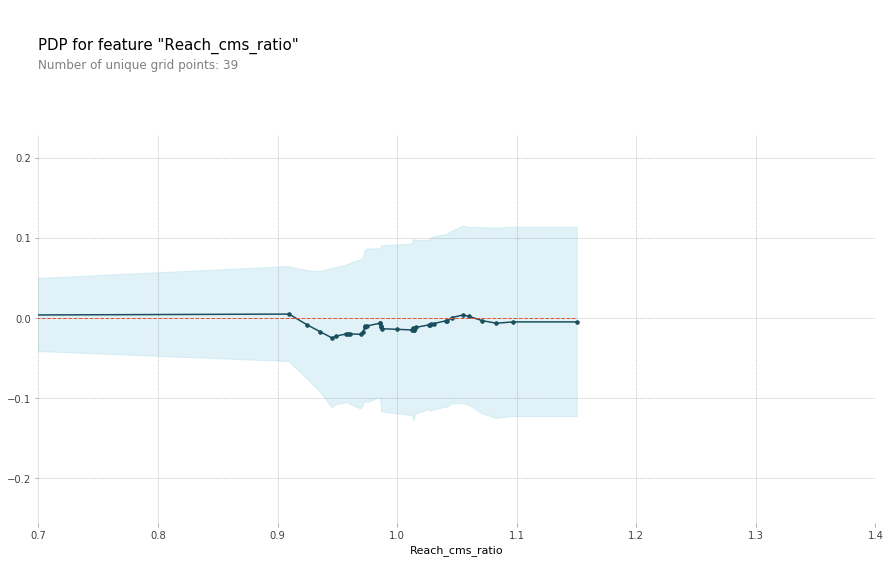

In [132]:
pdpPlot("Reach_cms_ratio")

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



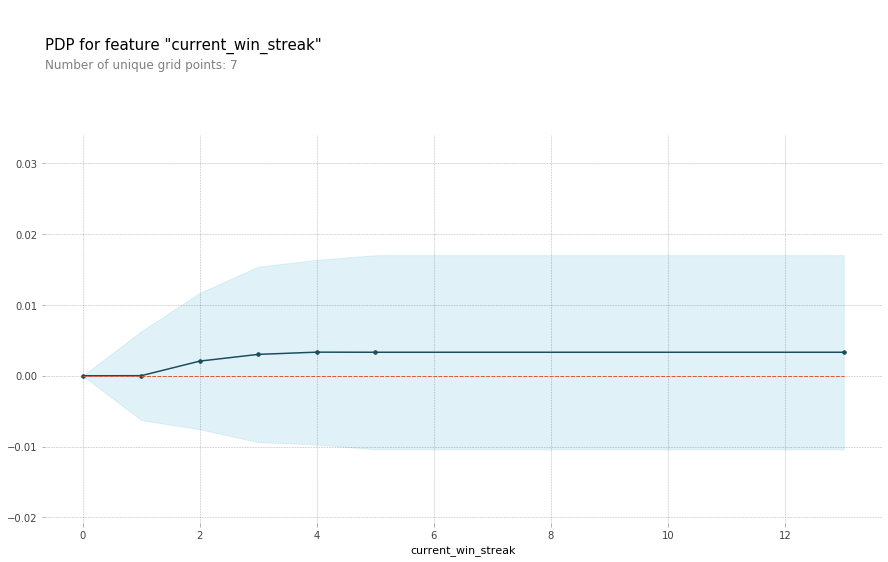

In [136]:
name = "current_win_streak"

isolated = pdp_isolate(
        model=model,
        dataset=X_test_transformed,
        model_features=X_test.columns,
        feature=name,
        num_grid_points=50,
)

fig, ax = pdp_plot(isolated, feature_name=name)
fig.show()

In [140]:
import pickle

with open("../pickles/feature_to_name.pickle", "rb") as f:
    feature_to_name = pickle.load(f)


In [143]:
print("{")
for k, v in feature_to_name.items():
    
    if v.endswith("pct"):
        v = v[-3:]
    
    if v.endswith(" att"):
        v += "empts"
    
    k = k.strip()
    v = v.strip()
    
    if k.endswith("_opponent"):
        v += " of opponent"
        
    print(f'"{k}": "{v}",')
    
print("}")

{
"Height_cms": "height",
"Reach_cms": "reach",
"Referee": "referee",
"Stance": "stance",
"Weight_lbs": "weight",
"age": "age",
"avg_BODY_att": "body strike attempts",
"avg_BODY_landed": "body strikes landed",
"avg_CLINCH_att": "clinch attempts",
"avg_CLINCH_landed": "clinch landed",
"avg_DISTANCE_att": "reach",
"avg_DISTANCE_landed": "reach",
"avg_GROUND_att": "ground strike attempts",
"avg_GROUND_landed": "ground strikes landed",
"avg_HEAD_att": "head strike attempts",
"avg_HEAD_landed": "head strikes landed",
"avg_KD": "kd",
"avg_LEG_att": "leg strike attempts",
"avg_LEG_landed": "leg strikes landed",
"avg_PASS": "pass",
"avg_REV": "rev",
"avg_SIG_STR_att": "signifcant strikes  attempts",
"avg_SIG_STR_landed": "signifcant strikes  landed",
"avg_SIG_STR_pct": "pct",
"avg_SIG_STatt": "significant strikes attempts",
"avg_SIG_STlanded": "significant strikes landed",
"avg_SIG_STpct": "pct",
"avg_SUATT": "suatt",
"avg_SUB_ATT": "submission attempts",
"avg_TD_att": "takedown attempts",
"av

In [150]:
feature_to_name = {
"Height_cms": "height",
"Reach_cms": "reach",
"Referee": "referee",
"Stance": "stance",
"Stance_Orthodox": "stance",
"Stance_Southpaw": "stance",
"Stance_Switch": "stance",
"Weight_lbs": "weight",
"age": "age",
"avg_BODY_att": "body strike attempts",
"avg_BODY_landed": "body strikes landed",
"avg_CLINCH_att": "clinch attempts",
"avg_CLINCH_landed": "clinch landed",
"avg_DISTANCE_att": "reach",
"avg_DISTANCE_landed": "reach",
"avg_GROUND_att": "ground strike attempts",
"avg_GROUND_landed": "ground strikes landed",
"avg_HEAD_att": "head strike attempts",
"avg_HEAD_landed": "head strikes landed",
"avg_KD": "kd",
"avg_LEG_att": "leg strike attempts",
"avg_LEG_landed": "leg strikes landed",
"avg_PASS": "pass",
"avg_REV": "rev",
"avg_SIG_STR_att": "signifcant strikes  attempts",
"avg_SIG_STR_landed": "signifcant strikes  landed",
"avg_SIG_STR_pct": "pct",
"avg_SIG_STatt": "significant strikes attempts",
"avg_SIG_STlanded": "significant strikes landed",
"avg_SIG_STpct": "pct",
"avg_SUATT": "suatt",
"avg_SUB_ATT": "submission attempts",
"avg_TD_att": "takedown attempts",
"avg_TD_landed": "takedowns landed",
"avg_TD_pct": "number of takedowns",
"avg_TOTAL_STR_att": "total strikes  attempts",
"avg_TOTAL_STR_landed": "total strikes  landed",
"avg_TOTAL_STatt": "total strikes attempted",
"avg_TOTAL_STlanded": "total strikes landed",
"avg_opp_BODY_att": "body strike defense",
"avg_opp_BODY_landed": "body strike defense",
"avg_opp_CLINCH_att": "clinch defense",
"avg_opp_CLINCH_landed": "clinch defense",
"avg_opp_DISTANCE_att": "defense",
"avg_opp_DISTANCE_landed": "defense",
"avg_opp_GROUND_att": "ground strike defense",
"avg_opp_GROUND_landed": "ground strike defense",
"avg_opp_HEAD_att": "head strike defense",
"avg_opp_HEAD_landed": "head strike defense",
"avg_opp_KD": "knockdown defense",
"avg_opp_LEG_att": "leg strike defense",
"avg_opp_LEG_landed": "leg strike defense",
"avg_opp_PASS": "pass",
"avg_opp_REV": "rev",
"avg_opp_SIG_STR_att": "signifcant strike defense",
"avg_opp_SIG_STR_landed": "signifcant strike defense",
"avg_opp_SIG_STR_pct": "signifcant strike defense",
"avg_opp_SIG_STatt": "significant strike defense",
"avg_opp_SIG_STlanded": "significant strike defense",
"avg_opp_SIG_STpct": "significant strike defense",
"avg_opp_SUATT": "suatt",
"avg_opp_SUB_ATT": "submission defense",
"avg_opp_TD_att": "takedown defense",
"avg_opp_TD_landed": "takedown defense",
"avg_opp_TD_pct": "takedown defense",
"avg_opp_TOTAL_STR_att": "strike defense",
"avg_opp_TOTAL_STR_landed": "strike defense",
"avg_opp_TOTAL_STatt": "significant strike defense",
"avg_opp_TOTAL_STlanded": "significant strike defense",
"current_lose_streak": "current lose streak",
"current_win_streak": "current win streak",
"date": "date",
"draw": "draw",
"fighter": "fighter",
"is_winner": "is winner",
"location": "location",
"longest_win_streak": "longest win streak",
"losses": "number of losses",
"no_of_rounds": "no of rounds",
"Height_cms_opponent": "height of opponent",
"Reach_cms_opponent": "reach of opponent",
"Stance_opponent": "stance of opponent",
"Stance_opponent_Orthodox": "stance of opponent",
"Stance_opponent_Southpaw": "stance of opponent",
"Stance_opponent_Switch": "stance of opponent",
"Weight_lbs_opponent": "weight of opponent",
"age_opponent": "age of opponent",
"avg_BODY_att_opponent": "body strike attempts of opponent",
"avg_BODY_landed_opponent": "body strikes landed of opponent",
"avg_CLINCH_att_opponent": "clinch attempts of opponent",
"avg_CLINCH_landed_opponent": "clinch landed of opponent",
"avg_DISTANCE_att_opponent": "distance attempts of opponent",
"avg_DISTANCE_landed_opponent": "distance landed of opponent",
"avg_GROUND_att_opponent": "ground strike attempts of opponent",
"avg_GROUND_landed_opponent": "ground strikes landed of opponent",
"avg_HEAD_att_opponent": "head strike attempts of opponent",
"avg_HEAD_landed_opponent": "head strikes landed of opponent",
"avg_KD_opponent": "number of knockdown by opponent",
"avg_LEG_att_opponent": "leg strike attempts of opponent",
"avg_LEG_landed_opponent": "leg strikes landed of opponent",
"avg_PASS_opponent": "pass of opponent",
"avg_REV_opponent": "rev of opponent",
"avg_SIG_STR_att_opponent": "signifcant strike  attempts of opponent",
"avg_SIG_STR_landed_opponent": "signifcant strikes  landed of opponent",
"avg_SIG_STR_pct_opponent": "signifcant strikes of opponent",
"avg_SUB_ATT_opponent": "submission attempts of opponent",
"avg_TD_att_opponent": "takedown attempts of opponent",
"avg_TD_landed_opponent": "takedown landed of opponent",
"avg_TD_pct_opponent": "takedown of opponent",
"avg_TOTAL_STR_att_opponent": "total strike  attempts of opponent",
"avg_TOTAL_STR_landed_opponent": "total strikes  landed of opponent",
"avg_opp_BODY_att_opponent": "body strike defense of opponent",
"avg_opp_BODY_landed_opponent": "body strike defense of opponent",
"avg_opp_CLINCH_att_opponent": "clinch defense of opponent",
"avg_opp_CLINCH_landed_opponent": "clinch defense of opponent",
"avg_opp_DISTANCE_att_opponent": "distance strike defense of opponent",
"avg_opp_DISTANCE_landed_opponent": "distance strike defense of opponent",
"avg_opp_GROUND_att_opponent": "ground strike defense of opponent",
"avg_opp_GROUND_landed_opponent": "ground strikes defense of opponent",
"avg_opp_HEAD_att_opponent": "head strike defense of opponent",
"avg_opp_HEAD_landed_opponent": "head strikes defense of opponent",
"avg_opp_KD_opponent": "knockdown defense of opponent",
"avg_opp_LEG_att_opponent": "leg strike defense of opponent",
"avg_opp_LEG_landed_opponent": "leg strikes defense of opponent",
"avg_opp_PASS_opponent": "pass of opponent",
"avg_opp_REV_opponent": "rev of opponent",
"avg_opp_SIG_STR_att_opponent": "signifcant strike defense of opponent",
"avg_opp_SIG_STR_landed_opponent": "signifcant strike defense of opponent",
"avg_opp_SIG_STR_pct_opponent": "signifcant strike defense of opponent",
"avg_opp_SUB_ATT_opponent": "submission defense of opponent",
"avg_opp_TD_att_opponent": "takedown defense of opponent",
"avg_opp_TD_landed_opponent": "takedown defense of opponent",
"avg_opp_TD_pct_opponent": "takedown defense of opponent",
"avg_opp_TOTAL_STR_att_opponent": "strike defense of opponent",
"avg_opp_TOTAL_STR_landed_opponent": "strike defense of opponent",
"current_lose_streak_opponent": "current lose streak of opponent",
"current_win_streak_opponent": "current win streak of opponent",
"draw_opponent": "draw of opponent",
"fighter_opponent": "prestige of opponent",
"longest_win_streak_opponent": "longest win streak of opponent",
"losses_opponent": "number of losses of opponent",
"total_rounds_fought_opponent": "total rounds fought of opponent",
"total_time_fought(seconds)_opponent": "total time fought of opponent",
"total_title_bouts_opponent": "total title bouts of opponent",
"win_by_Decision_Majority_opponent": "number of wins by decision majority of opponent",
"win_by_Decision_Split_opponent": "number of wins by decision split of opponent",
"win_by_Decision_Unanimous_opponent": "number of wins by decision unanimous of opponent",
"win_by_KO/TKO_opponent": "number of wins by ko/tko of opponent",
"win_by_Submission_opponent": "win by submission of opponent",
"win_by_TKO_Doctor_Stoppage_opponent": "win by tko doctor stoppage of opponent",
"wins_opponent": "wins of opponent",
"title_bout": "title bout",
"total_rounds_fought": "total rounds fought",
"total_time_fought(seconds)": "total time fought",
"total_title_bouts": "total title bouts",
"weight_class": "weight class",
"win_by_Decision_Majority": "number of wins by decision",
"win_by_Decision_Split": "number of wins by decision",
"win_by_Decision_Unanimous": "number of wins by decision",
"win_by_KO/TKO": "number of wins by ko/tko",
"win_by_Submission": "number of wins by submission",
"win_by_TKO_Doctor_Stoppage": "number of wins by tko doctor stoppage",
"wins": "number of wins",
"Height_cms_ratio": "height",
"Reach_cms_ratio": "reach",
"Weight_lbs_ratio": "weight",
"age_ratio": "age",
"avg_BODY_att_ratio": "body strike attempts",
"avg_BODY_landed_ratio": "body strikes landed",
"avg_CLINCH_att_ratio": "clinch attempts",
"avg_CLINCH_landed_ratio": "clinch landed",
"avg_DISTANCE_att_ratio": "reach",
"avg_DISTANCE_landed_ratio": "reach",
"avg_GROUND_att_ratio": "ground strike attempts",
"avg_GROUND_landed_ratio": "ground strikes landed",
"avg_HEAD_att_ratio": "head strike attempts",
"avg_HEAD_landed_ratio": "head strikes landed",
"avg_KD_ratio": "knockdowns",
"avg_LEG_att_ratio": "leg strike attempts",
"avg_LEG_landed_ratio": "leg strikes landed",
"avg_PASS_ratio": "pass",
"avg_REV_ratio": "rev",
"avg_SIG_STR_att_ratio": "signifcant strike  attempts",
"avg_SIG_STR_landed_ratio": "signifcant strikes  landed",
"avg_SIG_STR_pct_ratio": "signifcant strikes",
"avg_SUB_ATT_ratio": "submission attempts",
"avg_TD_att_ratio": "takedown attempts",
"avg_TD_landed_ratio": "takedowns landed",
"avg_TD_pct_ratio": "takedowns",
"avg_TOTAL_STR_att_ratio": "total strike  attempts",
"avg_TOTAL_STR_landed_ratio": "total strikes  landed",
"avg_opp_BODY_att_ratio": "body strike defense",
"avg_opp_BODY_landed_ratio": "body strike defense",
"avg_opp_CLINCH_att_ratio": "clinch defense",
"avg_opp_CLINCH_landed_ratio": "clinch defense",
"avg_opp_DISTANCE_att_ratio": "distance strike defense",
"avg_opp_DISTANCE_landed_ratio": "distance strike defense",
"avg_opp_GROUND_att_ratio": "ground strike defense",
"avg_opp_GROUND_landed_ratio": "ground strike defense",
"avg_opp_HEAD_att_ratio": "head strike defense",
"avg_opp_HEAD_landed_ratio": "head strike defense",
"avg_opp_KD_ratio": "knockdown defense",
"avg_opp_LEG_att_ratio": "leg strike defense",
"avg_opp_LEG_landed_ratio": "leg strike defense",
"avg_opp_PASS_ratio": "pass",
"avg_opp_REV_ratio": "rev",
"avg_opp_SIG_STR_att_ratio": "signifcant strike defense",
"avg_opp_SIG_STR_landed_ratio": "signifcant strike defense",
"avg_opp_SIG_STR_pct_ratio": "signifcant strike defense",
"avg_opp_SUB_ATT_ratio": "submission defense",
"avg_opp_TD_att_ratio": "takedown defense",
"avg_opp_TD_landed_ratio": "takedown defense",
"avg_opp_TD_pct_ratio": "pct",
"avg_opp_TOTAL_STR_att_ratio": "strike defense",
"avg_opp_TOTAL_STR_landed_ratio": "strike defense",
"current_lose_streak_ratio": "current lose streak",
"current_win_streak_ratio": "current win streak",
"draw_ratio": "number of draws",
"longest_win_streak_ratio": "longest win streak",
"losses_ratio": "losses",
"total_rounds_fought_ratio": "total rounds fought",
"total_time_fought(seconds)_ratio": "total time fought",
"total_title_bouts_ratio": "total title bouts",
"win_by_Decision_Majority_ratio": "number of wins by decision",
"win_by_Decision_Split_ratio": "number of wins by decision",
"win_by_Decision_Unanimous_ratio": "number of wins by decision",
"win_by_KO/TKO_ratio": "number of wins by ko/tko",
"win_by_Submission_ratio": "number of wins by submission",
"win_by_TKO_Doctor_Stoppage_ratio": "number of wins by tko doctor stoppage",
"wins_ratio": "number of wins",
}

In [151]:
with open("../pickles/feature_to_name.pickle", "wb") as f:
    pickle.dump(feature_to_name, f)

In [8]:
tuple(set(fighters_df["weight_class"]))

('Bantamweight',
 "Women's Flyweight",
 'Light Heavyweight',
 'Welterweight',
 'Catch Weight',
 "Women's Featherweight",
 'Middleweight',
 "Women's Strawweight",
 "Women's Bantamweight",
 'Heavyweight',
 'Flyweight',
 'Open Weight',
 'Featherweight',
 'Lightweight')

In [ ]:
(
    ('Heavyweight', 'Heavyweight',)
    ('Light Heavyweight (205 lbs.)', 'Light Heavyweight',)
    ('Middleweight (185 lbs.)', 'Middleweight',)
    ('Welterweight (170 lbs.)', 'Welterweight',)
    ('Lightweight (155 lbs.)', 'Lightweight',)
    ('Featherweight (145 lbs.)', 'Featherweight',)
    ('Bantamweight (135 lbs.)', 'Bantamweight',)
    ('Flyweight (125 lbs.)', 'Flyweight',)
    ("Women's Featherweight (145 lbs.)", "Women's Featherweight",)
    ("Women's Bantamweight (135 lbs.)", "Women's Bantamweight",)
    ("Women's Flyweight (125 lbs.)", "Women's Flyweight",)
    ("Women's Strawweight (115 lbs.)", "Women's Strawweight",)
    ('Open Weight', 'Open Weight',)
)